# Data Summarization and Visualization
## Topics
- Skewness & Kurtosis
- Correlation Matrix
- 1-D Statistical Analysis
- 2-D Statistical Analysis
- Contingency Tables
- PCA
- Scatter Plot
- Dot Plot
- Bar Plot

## Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data Loading

In [2]:
# Load the dataset
file_path = "KosteckiDillon.csv"
data = pd.read_csv(file_path)

# Drop rows with missing values
data_clean = data.dropna()

## Skewness and Kurtosis for numerical columns

In [13]:
numerical_columns = data_clean.select_dtypes(include=['float64', 'int64']).columns
skewness_vals = data_clean[numerical_columns].apply(skew)
kurtosis_vals = data_clean[numerical_columns].apply(kurtosis)

print("\nSkewness of numerical columns:")
print(skewness_vals)


Skewness of numerical columns:
rownames    0.000000
id         -0.005959
time        1.113646
dos         0.038963
age        -0.152439
airq        1.075276
dtype: float64


In [14]:
print("\nKurtosis of numerical columns:")
print(kurtosis_vals)


Kurtosis of numerical columns:
rownames   -1.200000
id         -1.188111
time        2.247225
dos        -1.231266
age        -0.690061
airq        1.688309
dtype: float64


## Correlation Matrix


Correlation Matrix:


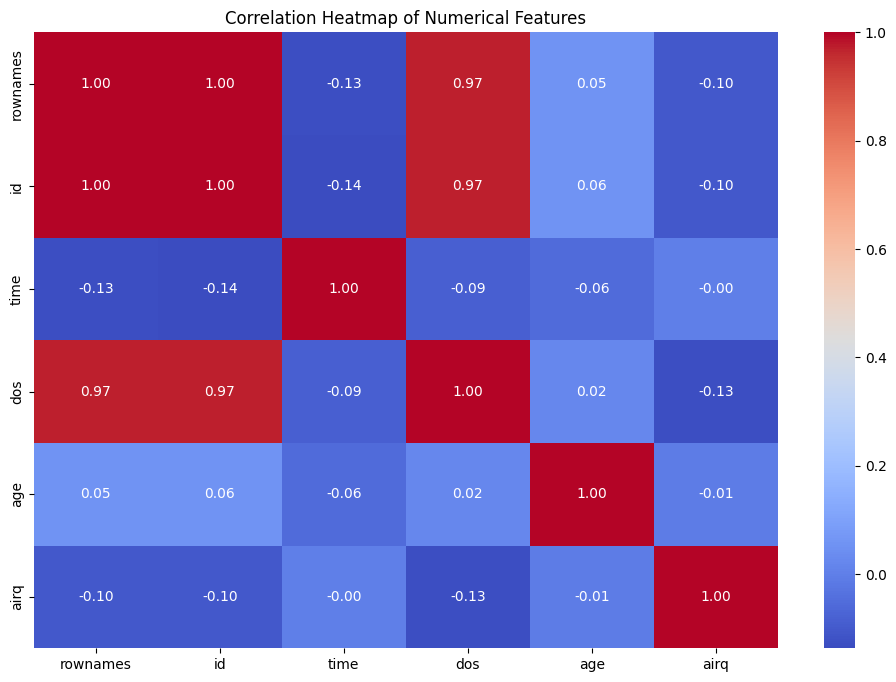

In [ ]:
print("\nCorrelation Matrix:")
correlation_matrix = data_clean[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 1-D Statistical Analysis


In [ ]:
age_data = data_clean['age']
mean_age = age_data.mean()
median_age = age_data.median()
std_age = age_data.std()
min_age = age_data.min()
max_age = age_data.max()

print(f"\n1-D Statistical Analysis for 'age':")
print(f"Mean: {mean_age}")
print(f"Median: {median_age}")
print(f"Standard Deviation: {std_age}")
print(f"Min: {min_age}, Max: {max_age}")


1-D Statistical Analysis for 'age':
Mean: 42.363921001926784
Median: 44.0
Standard Deviation: 11.201243987490061
Min: 18, Max: 66


### Visualizing Distribution

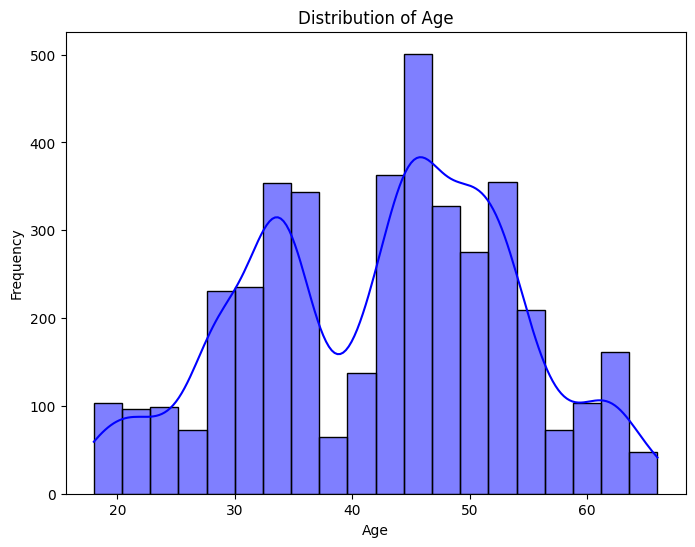

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(age_data, kde=True, color='blue', bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## 2-D Statistical Data Analysis: Scatter Plots

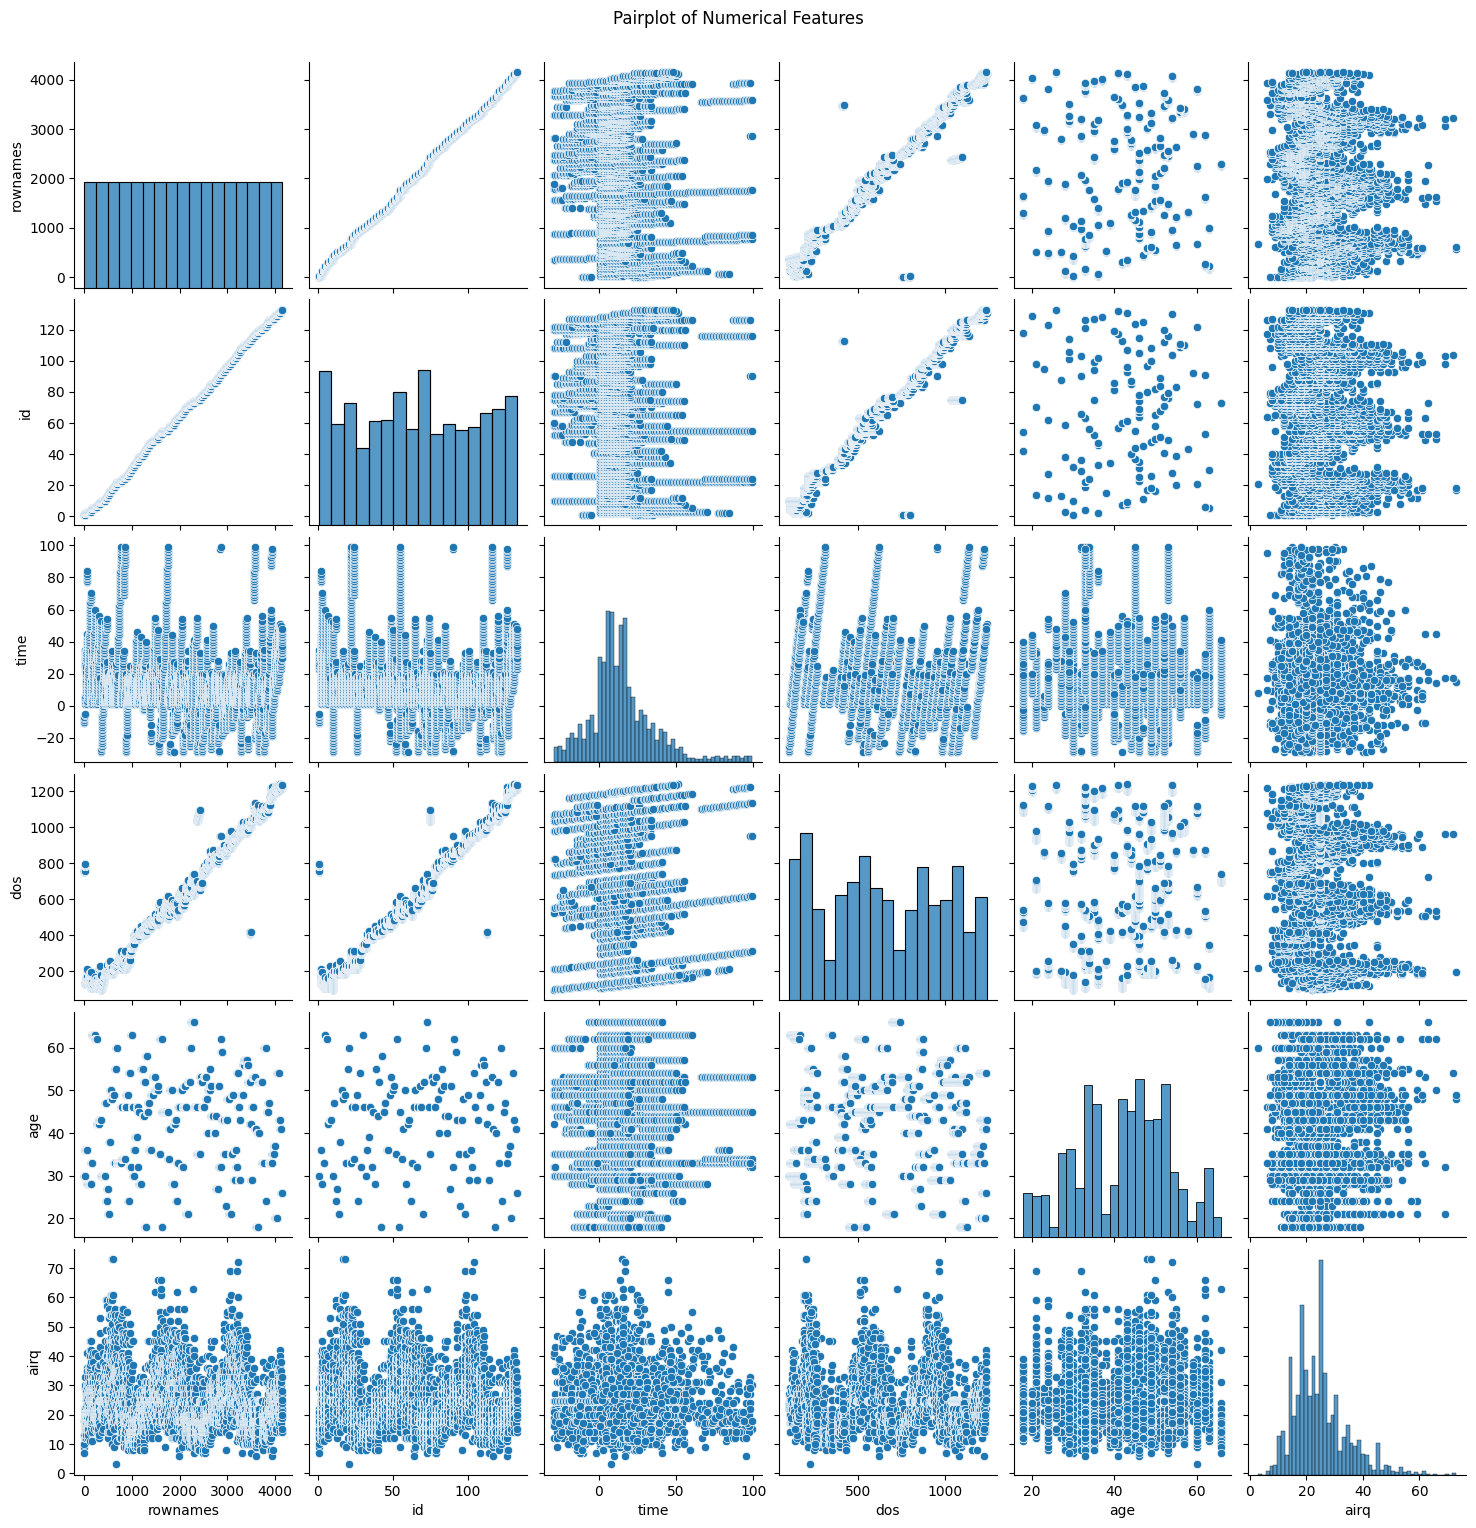

In [15]:
sns.pairplot(data_clean[numerical_columns])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

## Contingency Tables

In [ ]:
categorical_columns = data_clean.select_dtypes(include=['object', 'category']).columns
for cat_col in categorical_columns:
    contingency_table = pd.crosstab(data_clean[cat_col], data_clean["age"])  # Example: Relationship with Age
    print(f"\nContingency Table for {cat_col} and Age:")
    print(contingency_table)


Contingency Table for hatype and Age:
age      18  20  21  23  24  26  27  28  29   30  ...  54  55  56  57  58  59  \
hatype                                            ...                           
Aura     16   0  97   0  16  23  28  70  51  121  ...   0  12  34   0   0  20   
Mixed    26  28   0   0   0   0   0  43   0    0  ...   0   0   0  55  18   0   
No Aura  33   0   0  12  71   0  21  34  33    0  ...  88  51  24   0   0   0   

age      60  62  63  66  
hatype                   
Aura      0  51  78   0  
Mixed     0   0   0   0  
No Aura  83  32   0  47  

[3 rows x 42 columns]

Contingency Table for medication and Age:
age         18  20  21  23  24  26  27   28  29   30  ...  54  55  56  57  58  \
medication                                            ...                       
continuing  26  28  85  12   0  23   0  104  60  100  ...  88   0  58   0   0   
none        49   0  12   0  43   0  21    0  24    0  ...   0  51   0   0   0   
reduced      0   0   0   0  44   0 

## PCA

In [8]:
# PCA for n-Dimensional Data Analysis
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean[numerical_columns])

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# DataFrame for PCA result
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

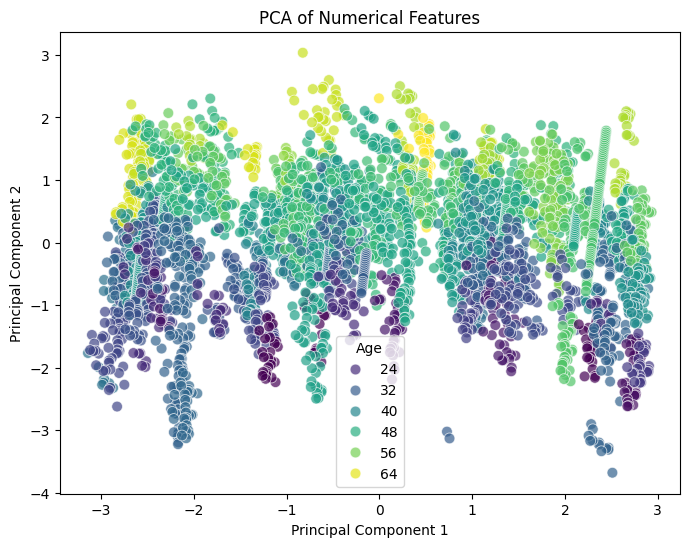

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=data_clean["age"], palette="viridis", s=60, alpha=0.7)
plt.title("PCA of Numerical Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Age")
plt.show()

## Scatter Plot

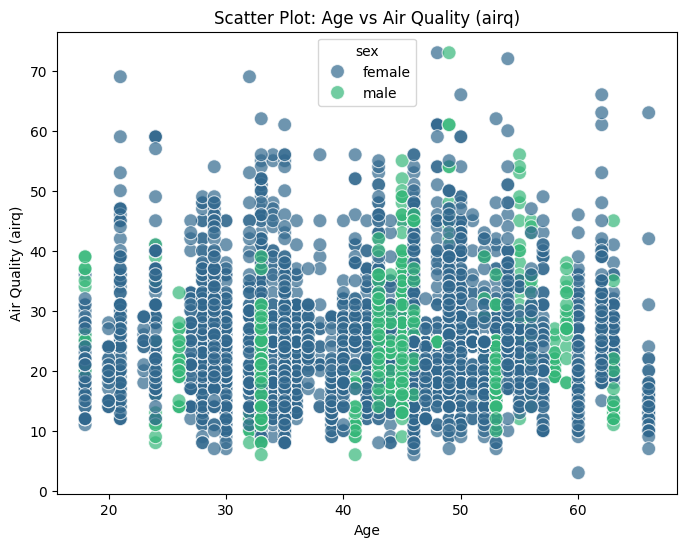

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_clean["age"], y=data_clean["airq"], hue=data_clean["sex"], palette="viridis", s=100, alpha=0.7)
plt.title("Scatter Plot: Age vs Air Quality (airq)")
plt.xlabel("Age")
plt.ylabel("Air Quality (airq)")
plt.show()

## Dot Plot

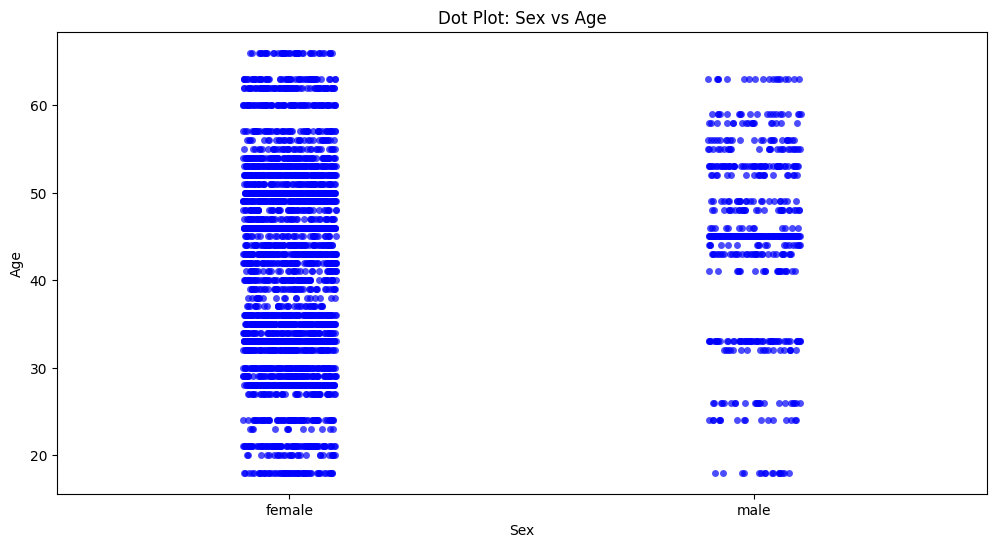

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(x=data_clean["sex"], y=data_clean["age"], jitter=True, color='blue', alpha=0.7)
plt.title("Dot Plot: Sex vs Age")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

## Bar Plot (Medication counts)

C:\Users\aathe\AppData\Local\Temp\ipykernel_21248\1847127069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_clean["medication"], palette="viridis")


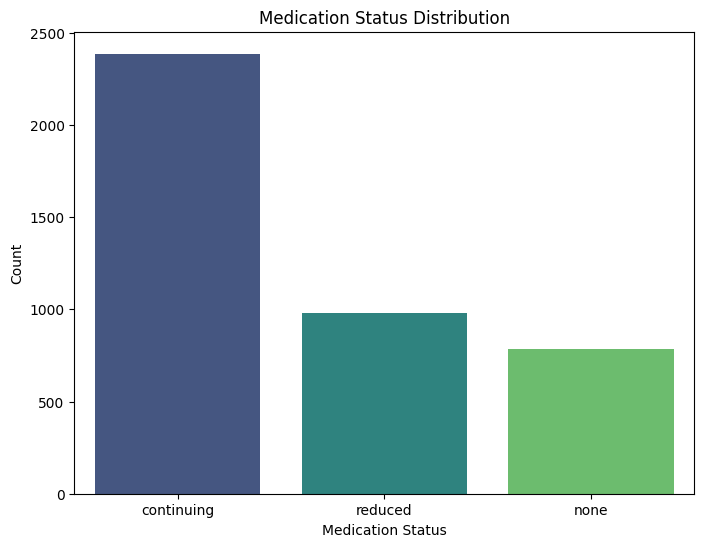

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data_clean["medication"], palette="viridis")
plt.title("Medication Status Distribution")
plt.xlabel("Medication Status")
plt.ylabel("Count")
plt.show()